In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import os

In [3]:
# don't use default na, this erroneously converts 'NA' (iso code for Namibia) to a missing value
# I manually input all the default na vals except for 'NA' to prevent this
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
hatch_v2 = pd.read_csv('all_tech_version 2.0.csv', keep_default_na=False, 
                       na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', 
                                  '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', 'None', ''])

In [4]:
# we just want to test cost data
hatch_v2_cost = hatch_v2[(hatch_v2['Metric']=='Levelized Cost of Energy') | (hatch_v2['Metric']=='Price') | (hatch_v2['Metric']=='Total Installed Cost')]
hatch_v2_cost.reset_index(drop=True, inplace=True)

In [5]:
tech_cost_list = set(hatch_v2_cost['Technology Name'])
len(tech_cost_list)

105

In [6]:
hatch_v2_cost_world = hatch_v2_cost[(hatch_v2_cost['Country Name']=='World') & (hatch_v2_cost['Metric']!='Total Installed Cost')]
hatch_v2_cost_world.reset_index(drop=True, inplace=True)
hatch_v2_cost_world


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Maleic Anhydride_Price_World,Global,World,World,Maleic Anhydride,Price,2022 USD/lb,PCDB,Price|Maleic Anhydride,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Polyvinylchloride_Price_World,Global,World,World,Polyvinylchloride,Price,2022 USD/lb,PCDB,Price|Polyvinylchloride,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pentaerythritol_Price_World,Global,World,World,Pentaerythritol,Price,2022 USD/lb,PCDB,Price|Pentaerythritol,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paraxylene_Price_World,Global,World,World,Paraxylene,Price,2022 USD,PCDB,Price|Paraxylene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Urea_Price_World,Global,World,World,Urea,Price,2022 USD/lb,PCDB,Price|Urea,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Polyester Fiber_Price_World,Global,World,World,Polyester Fiber,Price,2022 USD/lb,PCDB,Price|Polyester Fiber,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,Bioenergy_Levelized Cost of Energy_World,Global,World,World,Bioenergy,Levelized Cost of Energy,2022 USD/kWh,IRENA,Levelized Cost of Energy|Bioenergy,NaN,...,0.076145,0.076029,0.059223,0.068394,0.077530,0.072042,NaN,NaN,NaN,NaN
73,Geothermal Energy_Levelized Cost of Energy_World,Global,World,World,Geothermal Energy,Levelized Cost of Energy,2022 USD/kWh,IRENA,Levelized Cost of Energy|Geothermal Energy,NaN,...,0.072533,0.075866,0.072300,0.072002,0.058051,0.072334,NaN,NaN,NaN,NaN
74,Styrene_Price_World,Global,World,World,Styrene,Price,2022 USD/lb,PCDB,Price|Styrene,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
def hatch_plot(df, idx, entity):
    tech_name = df.iloc[idx]['Technology Name']
    unit = df.iloc[idx]['Unit']
    tech_series = df.iloc[idx][9:]
    tech_series.dropna(how='all', inplace=True)
    ax = tech_series.plot.line()
    ax.set_title(tech_name + ' (' + entity +')')
    ax.set_ylabel(unit)
    ax.set_ylim(ymin=0)
    file_name = 'cost visuals/' + tech_name + '.png'
    matplotlib.pyplot.savefig(file_name)
    # line below is needed to clear axes
    # without it the loop will write over the same graph and try to plot 100 lines on one graph
    matplotlib.pyplot.cla()

In [7]:
world_cost = set(hatch_v2_cost_world['Technology Name'])
len(world_cost)

76

FileNotFoundError: [Errno 2] No such file or directory: 'cost visuals/Maleic Anhydride.png'

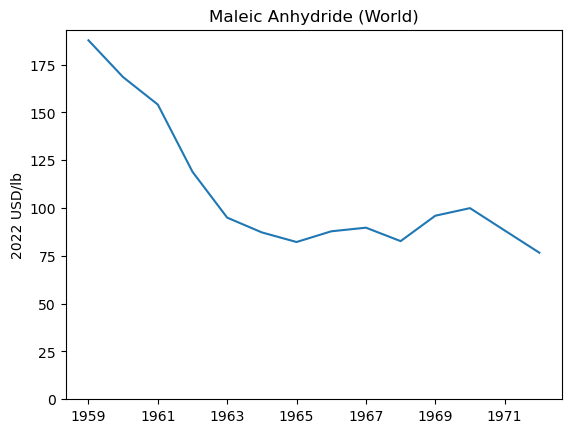

In [31]:
for idx in range(len(hatch_v2_cost_world)):
    hatch_plot(hatch_v2_cost_world, idx, 'World')

In [32]:
os.listdir()

['all_tech_version 1.5.csv',
 'cost visuals.ipynb',
 '.DS_Store',
 'HistoricalTech_Summary.yaml',
 'all_tech_with_country-level.csv',
 'all_tech_version 1.0.csv',
 'inventory.xlsx',
 'inventory.ipynb',
 'compiler.ipynb',
 'all_tech_version1.5_IIACFormat.xlsx',
 'visualize',
 'all_tech_version 2.0.csv',
 'cleaned data',
 '.gitignore',
 'reading files',
 'data checks.ipynb',
 'Technology CharacteristicsV2.xlsx',
 '.ipynb_checkpoints',
 'inflation',
 '.git',
 'HATCH-validation.ipynb',
 'data sources.xlsx',
 'raw data']

In [8]:
no_world_data = list(tech_cost_list - world_cost)
len(no_world_data)

29

In [9]:
idx_world = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data:
        idx_world.append(idx)
hatch_v2_cost_no_world = hatch_v2_cost.drop(idx_world)
len(set(hatch_v2_cost_no_world['Technology Name']))

29

In [10]:
hatch_v2_cost_us = hatch_v2_cost_no_world[hatch_v2_cost_no_world['Country Code']=='US']
hatch_v2_cost_us.reset_index(drop=True, inplace=True)
hatch_v2_cost_us

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Cow's Milk Production_Price_US,National,US,United States of America,Cow's Milk Production,Price,producer price index,FAOSTAT,Price|Cow's Milk Production,NaN,...,85.040000,92.130000,84.780000,97.0200,95.040000,96.550000,98.06,NaN,NaN,NaN
1,Natural Gas Production_Price_US,National,US,US,Natural Gas Production,Price,USD/million Btu,BP,Price|Natural Gas Production,NaN,...,2.461839,2.960584,3.116446,2.5119,1.988582,3.839473,NaN,NaN,NaN,NaN
2,Electric Water Heaters and Immersion Heaters_P...,National,US,United States of America,Electric Water Heaters and Immersion Heaters,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Electric Water Heaters and Immersion Hea...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Household Washing and Drying Machines_Price_US,National,US,United States of America,Household Washing and Drying Machines,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Household Washing and Drying Machines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Microwave Ovens_Price_US,National,US,United States of America,Microwave Ovens,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Microwave Ovens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Combined Refrigerators-Freezers_Price_US,National,US,United States of America,Combined Refrigerators-Freezers,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Combined Refrigerators-Freezers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cotton Seed Production_Price_US,National,US,United States of America,Cotton Seed Production,Price,producer price index,FAOSTAT,Price|Cotton Seed Production,NaN,...,94.990000,68.920000,75.550000,77.3200,93.670000,117.860000,142.06,NaN,NaN,NaN
7,Sugar Cane Production_Price_US,National,US,United States of America,Sugar Cane Production,Price,producer price index,FAOSTAT,Price|Sugar Cane Production,NaN,...,100.000000,94.440000,102.780000,116.6700,125.230000,125.230000,136.33,NaN,NaN,NaN
8,Corn Production_Price_US,National,US,United States of America,Corn Production,Price,producer price index,FAOSTAT,Price|Corn Production,NaN,...,94.290000,94.290000,101.430000,107.8600,120.710000,153.250000,185.79,NaN,NaN,NaN
9,Soybean Production_Price_US,National,US,United States of America,Soybean Production,Price,producer price index,FAOSTAT,Price|Soybean Production,NaN,...,99.620000,97.900000,89.030000,91.8900,117.370000,136.720000,156.08,NaN,NaN,NaN


In [11]:
us_cost = set(hatch_v2_cost_us['Technology Name'])
len(us_cost)

10

In [12]:
no_world_or_us_data = list(tech_cost_list - world_cost - us_cost)
len(no_world_or_us_data)

19

In [18]:
idx_world_us = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data or tech not in no_world_or_us_data:
        idx_world_us.append(idx)
hatch_v2_cost_no_world_or_us = hatch_v2_cost.drop(idx_world_us)

In [14]:
hatch_v2_cost_gb = hatch_v2_cost_no_world_or_us[hatch_v2_cost_no_world_or_us['Country Code']=='GB']
hatch_v2_cost_gb.reset_index(drop=True, inplace=True)
hatch_v2_cost_gb

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Radio Receivers_Price_GB,National,GB,United Kingdom,Radio Receivers,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Radio Receivers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Caustic Soda_Price_GB,National,GB,United Kingdom,Caustic Soda,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Caustic Soda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bicycles and Other Cycles_Price_GB,National,GB,United Kingdom,Bicycles and Other Cycles,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Bicycles and Other Cycles,NaN,...,0.747428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turbo-Jets of a Thrust Not Exceeding 25 kN_Pri...,National,GB,United Kingdom,Turbo-Jets of a Thrust Not Exceeding 25 kN,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Turbo-Jets of a Thrust Not Exceeding 25 kN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Telephones and Videophones_Price_GB,National,GB,United Kingdom,Telephones and Videophones,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Telephones and Videophones,NaN,...,0.174677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Synthetic Filament Tow and Staple Fibers_Price_GB,National,GB,United Kingdom,Synthetic Filament Tow and Staple Fibers,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Synthetic Filament Tow and Staple Fibers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Household Refrigerators and Freezers_Price_GB,National,GB,United Kingdom,Household Refrigerators and Freezers,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Household Refrigerators and Freezers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Beer_Price_GB,National,GB,United Kingdom,Beer,Price,thousand USD/hectolitre,UN Industrial Commodity Statistics Database,Price|Beer,NaN,...,0.087095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Refined Copper_Price_GB,National,GB,United Kingdom,Refined Copper,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Refined Copper,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Air Conditioning Machines_Price_GB,National,GB,United Kingdom,Air Conditioning Machines,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Air Conditioning Machines,NaN,...,0.609574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
gb_cost = set(hatch_v2_cost_gb['Technology Name'])
len(gb_cost)

13

In [16]:
no_world_us_or_gb_data = list(tech_cost_list - world_cost - us_cost - gb_cost)
no_world_us_or_gb_data

['Television Receivers',
 'Synthetic Filament Yarn',
 'Liquefied Natural Gas (LNG)',
 'Potassic Fertilizers',
 'Coal Production',
 'Motorcycles and Scooters']

In [19]:
idx_world_us_gb = []
for idx in range(len(hatch_v2_cost)):
    tech = hatch_v2_cost['Technology Name'].iloc[idx]
    if tech not in no_world_data or tech not in no_world_or_us_data or tech not in no_world_us_or_gb_data:
        idx_world_us.append(idx)
hatch_v2_cost_no_world_us_or_gb = hatch_v2_cost.drop(idx_world_us)
hatch_v2_cost_jp = hatch_v2_cost_no_world_us_or_gb[hatch_v2_cost_no_world_us_or_gb['Country Code']=='JP']
hatch_v2_cost_jp.reset_index(drop=True, inplace=True)
hatch_v2_cost_jp

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Television Receivers_Price_JP,National,JP,Japan,Television Receivers,Price,million USD/unit,UN Industrial Commodity Statistics Database,Price|Television Receivers,NaN,...,0.000587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Synthetic Filament Yarn_Price_JP,National,JP,Japan,Synthetic Filament Yarn,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Synthetic Filament Yarn,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Liquefied Natural Gas (LNG)_Price_JP,National,JP,Japan,Liquefied Natural Gas (LNG),Price,USD/million Btu,BP,Price|Liquefied Natural Gas (LNG),NaN,...,6.933119,8.09827,10.066989,9.944666,7.781412,10.072739,NaN,NaN,NaN,NaN


In [27]:
hatch_v2_cost_br = hatch_v2_cost_no_world_us_or_gb[((hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Potassic Fertilizers') | (hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Motorcycles and Scooters')) & (hatch_v2_cost_no_world_us_or_gb['Country Code']=='BR')]
hatch_v2_cost_br.reset_index(drop=True, inplace=True)
hatch_v2_cost_br

,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Potassic Fertilizers_Price_BR,National,BR,Brazil,Potassic Fertilizers,Price,thousand USD/metric ton,UN Industrial Commodity Statistics Database,Price|Potassic Fertilizers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Motorcycles and Scooters_Price_BR,National,BR,Brazil,Motorcycles and Scooters,Price,thousand USD/unit,UN Industrial Commodity Statistics Database,Price|Motorcycles and Scooters,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
hatch_v2_cost_no_world_us_or_gb[(hatch_v2_cost_no_world_us_or_gb['Technology Name']=='Coal Production') & (hatch_v2_cost_no_world_us_or_gb['Country Name']=='North America')]


,ID,Spatial Scale,Country Code,Country Name,Technology Name,Metric,Unit,Data Source,Long Technology Name,1700,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
853,Coal Production_Price_North America,National,North America,North America,Coal Production,Price,USD/metric ton,BP,Price|Coal Production,NaN,...,51.447733,63.82529,72.844012,57.163984,42.76637,68.538142,NaN,NaN,NaN,NaN
